In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

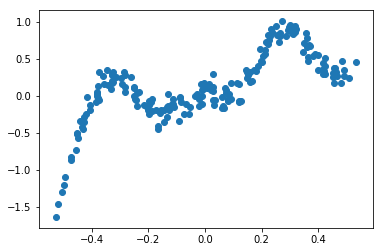

In [3]:
plt.scatter(x, y)

In [4]:
xx = np.linspace(min(x), max(x), num=200)

In [5]:
x_data = x.reshape(-1,1)
y_data = y.reshape(-1,1)

## Non Residual Network

In [6]:
import mylibrary.nnlib as tnn

_______________________
epoch 0
Loss 0.11138826726329323

_______________________
epoch 100
Loss 0.05322051478980787

_______________________
epoch 200
Loss 0.04835641908853718

_______________________
epoch 300
Loss 0.04757359653349762

_______________________
epoch 400
Loss 0.04678852605496434

_______________________
epoch 500
Loss 0.046045246384721246

_______________________
epoch 600
Loss 0.0453835010796082

_______________________
epoch 700
Loss 0.04482145249836704

_______________________
epoch 800
Loss 0.044357553895342516

_______________________
epoch 900
Loss 0.043971002359657

_______________________
epoch 1000
Loss 0.043662480183501336

_______________________
epoch 1100
Loss 0.043425786573847096

_______________________
epoch 1200
Loss 0.04322934248430674

_______________________
epoch 1300
Loss 0.043084504209740554

_______________________
epoch 1400
Loss 0.04296585317170333

_______________________
epoch 1500
Loss 0.042874971752376714

_______________________
epoch 160


_______________________
epoch 13400
Loss 0.04262764322493363

_______________________
epoch 13500
Loss 0.042627643224933766

_______________________
epoch 13600
Loss 0.042627643276701425

_______________________
epoch 13700
Loss 0.0426276432259515

_______________________
epoch 13800
Loss 0.04262764322493364

_______________________
epoch 13900
Loss 0.042627643224933634

_______________________
epoch 14000
Loss 0.04262764322493363

_______________________
epoch 14100
Loss 0.04262788326605221

_______________________
epoch 14200
Loss 0.04262764322523629

_______________________
epoch 14300
Loss 0.04262764322493387

_______________________
epoch 14400
Loss 0.04262764322493363

_______________________
epoch 14500
Loss 0.04262764322493363

_______________________
epoch 14600
Loss 0.042627807556999554

_______________________
epoch 14700
Loss 0.04262764322959663

_______________________
epoch 14800
Loss 0.042627643224933814

_______________________
epoch 14900
Loss 0.042627643224933634

__


_______________________
epoch 26600
Loss 0.04262764322495915

_______________________
epoch 26700
Loss 0.04262764322493363

_______________________
epoch 26800
Loss 0.04262764322493363

_______________________
epoch 26900
Loss 0.04262774285908692

_______________________
epoch 27000
Loss 0.04262764331104765

_______________________
epoch 27100
Loss 0.04262764322496617


TclError: invalid command name "pyimage14"

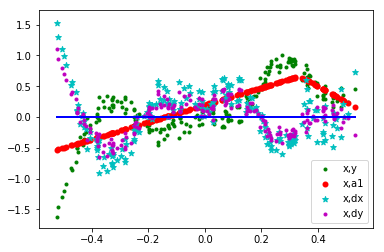

In [7]:
optimizer = tnn.Adam()

bias = tnn.BiasLayer(1, optimizer=optimizer)
out1 = tnn.DoubleRelu()
linear = tnn.LinearLayer(2, 1,optimizer=optimizer)
linear.weights = np.zeros_like(linear.weights)

net1 = tnn.AutoForm()
net1.collect_global_layers()


%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    a1 = net1.forward(x_data)
    
    loss = tnn.MseLoss.loss(a1, y_data)
    dy = tnn.MseLoss.del_loss(a1, y_data)
    
    dx = net1.backward(dy)
    
    net1.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

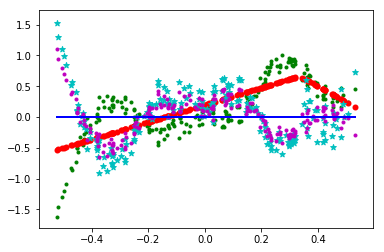

In [11]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)

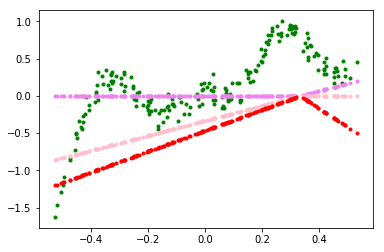

In [12]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, linear.input[:,0], marker='.', c='violet', label='x,a1')
plt.scatter(x, linear.input[:,1], marker='.', c='pink', label='x,a1')
plt.scatter(x, linear.zee-linear.bias, marker='.', c='r', label='x,a2')

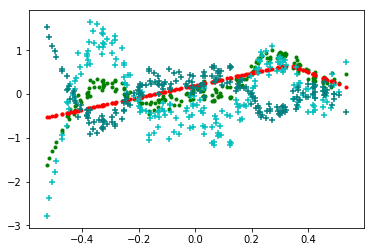

In [13]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
# plt.scatter(x, linear.input[:,0], marker='.', c='violet', label='x,a1')
# plt.scatter(x, linear.input[:,1], marker='.', c='pink', label='x,a1')
plt.scatter(x, linear.zee, marker='.', c='r', label='x,a2')
plt.scatter(x, out1.del_output[:,0], marker='+', c='c', label='x,da1')
plt.scatter(x, out1.del_output[:,1], marker='+', c='teal', label='x,da1')

(0.006703797006965449, 0.04972636732792441)

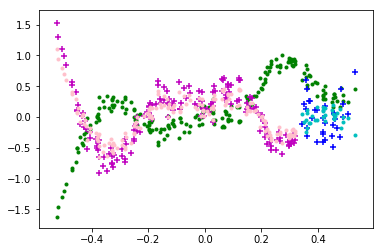

In [14]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
mask = out1.x >= 0.
plt.scatter(x[mask.reshape(-1)], bias.del_output[mask], marker='+', c='b', label='x,da1')
plt.scatter(x[~mask.reshape(-1)], bias.del_output[~mask], marker='+', c='m', label='x,da1')
plt.scatter(x[mask.reshape(-1)], dy[mask], marker='.', c='c', label='x,a1')
plt.scatter(x[~mask.reshape(-1)], dy[~mask], marker='.', c='pink', label='x,a1')
error1 = tnn.MseLoss().loss(a1[mask], y_data[mask])
error2 = tnn.MseLoss().loss(a1[~mask], y_data[~mask])
error1, error2

In [15]:
dy[mask], dy[~mask]

(array([-0.17927443, -0.08401623,  0.04324338,  0.06808061, -0.05205818,
         0.00870554,  0.11827505, -0.10072612,  0.15897385, -0.23868576,
         0.16078331, -0.07251602, -0.09983983, -0.04554263, -0.04292305,
        -0.02464945,  0.09621263,  0.10980697,  0.03743722,  0.00583156,
         0.14435346,  0.12674622,  0.19289273, -0.01881392,  0.05299291,
        -0.17866611,  0.0149767 ,  0.0682745 ,  0.11892808, -0.08290125,
        -0.28938545, -0.019551  ,  0.00302969]),
 array([ 1.09828261e+00,  7.89343505e-01,  6.06588357e-01,  3.68995318e-01,
         9.37503804e-01,  2.88424751e-01,  1.38372371e-01,  4.04965346e-01,
         7.67726947e-02,  7.05097839e-01,  7.12120791e-02, -3.71123184e-01,
        -1.43890539e-01,  8.63942821e-03, -1.18809494e-01, -2.42473048e-01,
        -4.18076094e-02, -3.40112040e-01,  4.87291471e-02, -8.69637934e-02,
        -1.75987701e-01, -2.61174064e-01, -3.55776216e-01, -4.67298189e-01,
        -3.08471771e-01, -3.87235010e-01, -5.70707549e-01

## Residual_Network_1_layer

In [18]:
optimizer = tnn.Adam()

bias = tnn.BiasLayer(1, optimizer=optimizer)
# bias.bias = bias.bias + 0.2
out1 = tnn.DoubleRelu()
linear = tnn.LinearLayer(2, 1,optimizer=optimizer)
# linear.weights = np.zeros_like(linear.weights)

resblock = tnn.AutoForm()
resblock.collect_global_layers()


%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    resout = resblock.forward(x_data)
    a1 = resout + x_data
    
    loss = tnn.MseLoss.loss(a1, y_data)
    dy = tnn.MseLoss.del_loss(a1, y_data)
    
    dx = resblock.backward(dy)
    dx = dx + dy
    
    resblock.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.07860535981499965

_______________________
epoch 100
Loss 0.04758194289237155

_______________________
epoch 200
Loss 0.04603319793804392

_______________________
epoch 300
Loss 0.04481598356395482

_______________________
epoch 400
Loss 0.04398419477600815

_______________________
epoch 500
Loss 0.043448162769851875

_______________________
epoch 600
Loss 0.04311890134635988

_______________________
epoch 700
Loss 0.042911210920403786

_______________________
epoch 800
Loss 0.04279483638901043

_______________________
epoch 900
Loss 0.04273081100326179

_______________________
epoch 1000
Loss 0.04269369174498111

_______________________
epoch 1100
Loss 0.04267598017430685

_______________________
epoch 1200
Loss 0.042662312167704296

_______________________
epoch 1300
Loss 0.04265189562794238

_______________________
epoch 1400
Loss 0.04264417666870375

_______________________
epoch 1500
Loss 0.04263861723821019

_______________________
epoch 160

TclError: invalid command name "pyimage71"

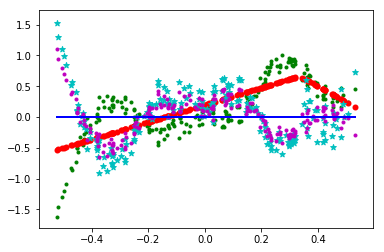

In [19]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)

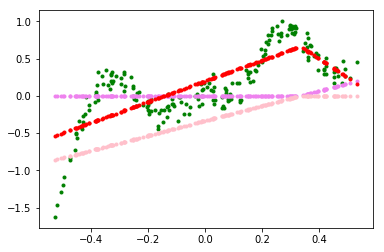

In [20]:
# Layer1 output
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, linear.input[:,0], marker='.', c='violet', label='x,a1')
plt.scatter(x, linear.input[:,1], marker='.', c='pink', label='x,a1')
plt.scatter(x, linear.zee+x_data, marker='.', c='r', label='x,a2')
# plt.scatter(x, la1.del_zee, marker='.', c='c', label='x,dz1')